In [2]:
import pandas as pd 
import seaborn as sb 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 


In [7]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
label = df['median_house_value']
label.name = 'price'


0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: price, Length: 20640, dtype: float64

In [31]:
df['square'] = df['total_rooms'] + df['total_bedrooms']
drop_parametrs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',  'median_income', 'ocean_proximity']

features = df.drop(drop_parametrs, axis = 1)
#features.pivot_table('median_house_value', index = 'median_house_value', columns = 'population', aggfunc = 'count')
features.corr()

,population,households,median_house_value,square
population,1.000000,0.907222,-0.024650,0.868826
households,0.907222,1.000000,0.065843,0.937700
median_house_value,-0.024650,0.065843,1.000000,0.120925
square,0.868826,0.937700,0.120925,1.000000


In [32]:
features.drop(['population', 'median_house_value'], axis = 1, inplace = True)
features

,households,square
0,126.0,1009.0
1,1138.0,8205.0
2,177.0,1657.0
3,219.0,1509.0
4,259.0,1907.0
...,...,...
20635,330.0,2039.0
20636,114.0,847.0
20637,433.0,2739.0
20638,349.0,2269.0


In [34]:
print(features.shape, label.shape)

(20640, 2) (20640,)


In [35]:
features.isnull().sum()

households      0
square        207
dtype: int64

In [38]:
features.mean()

households     499.539680
square        3174.374786
dtype: float64

In [41]:
features['square'].fillna(features['square'].mean(), inplace = True)
features.isnull().sum()

households    0
square        0
dtype: int64

In [42]:
label.isnull().sum()

0

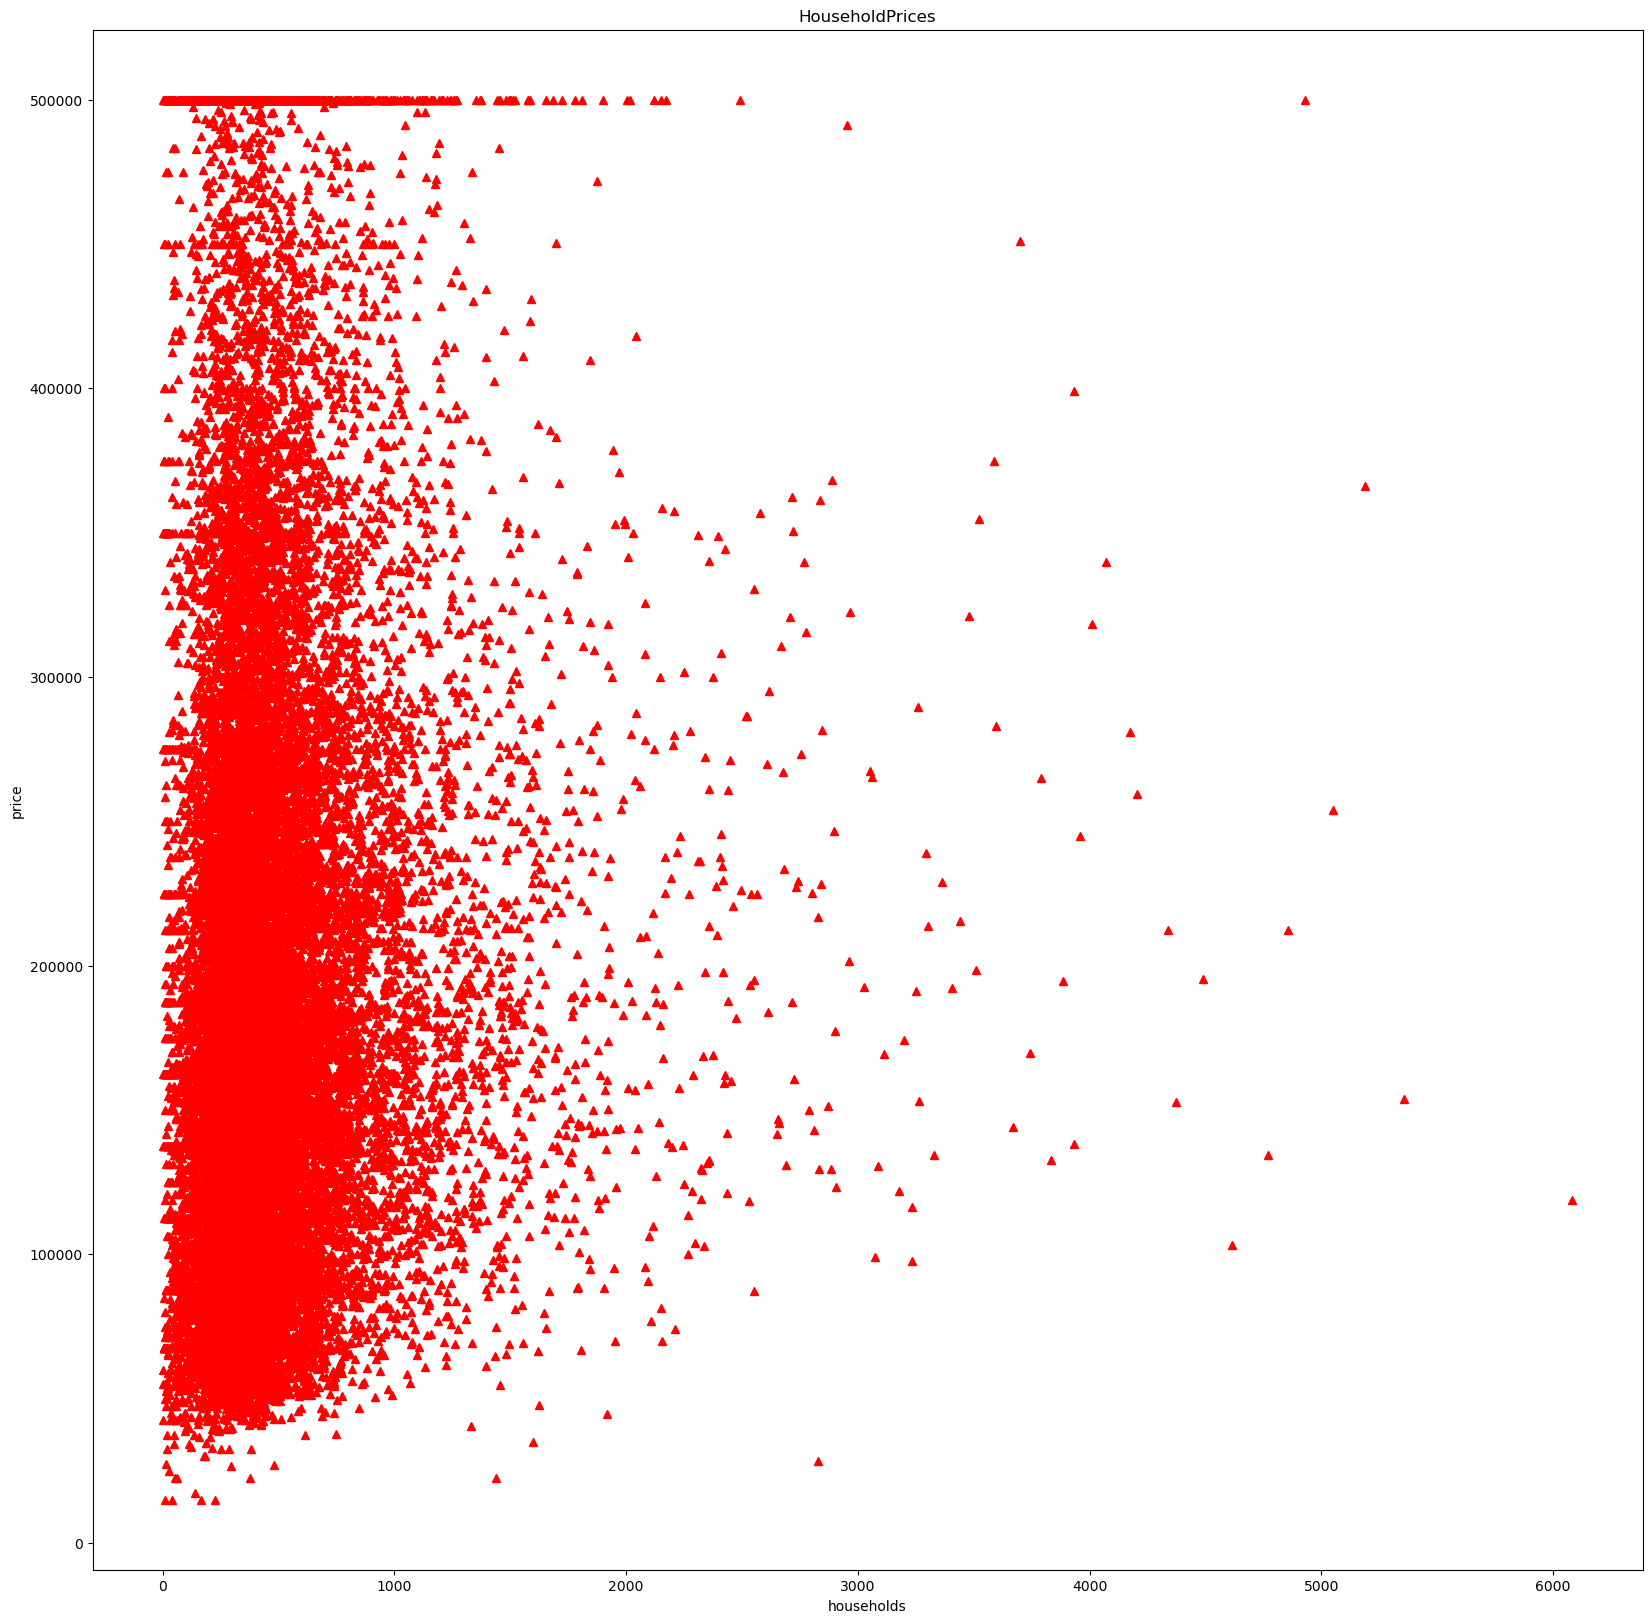

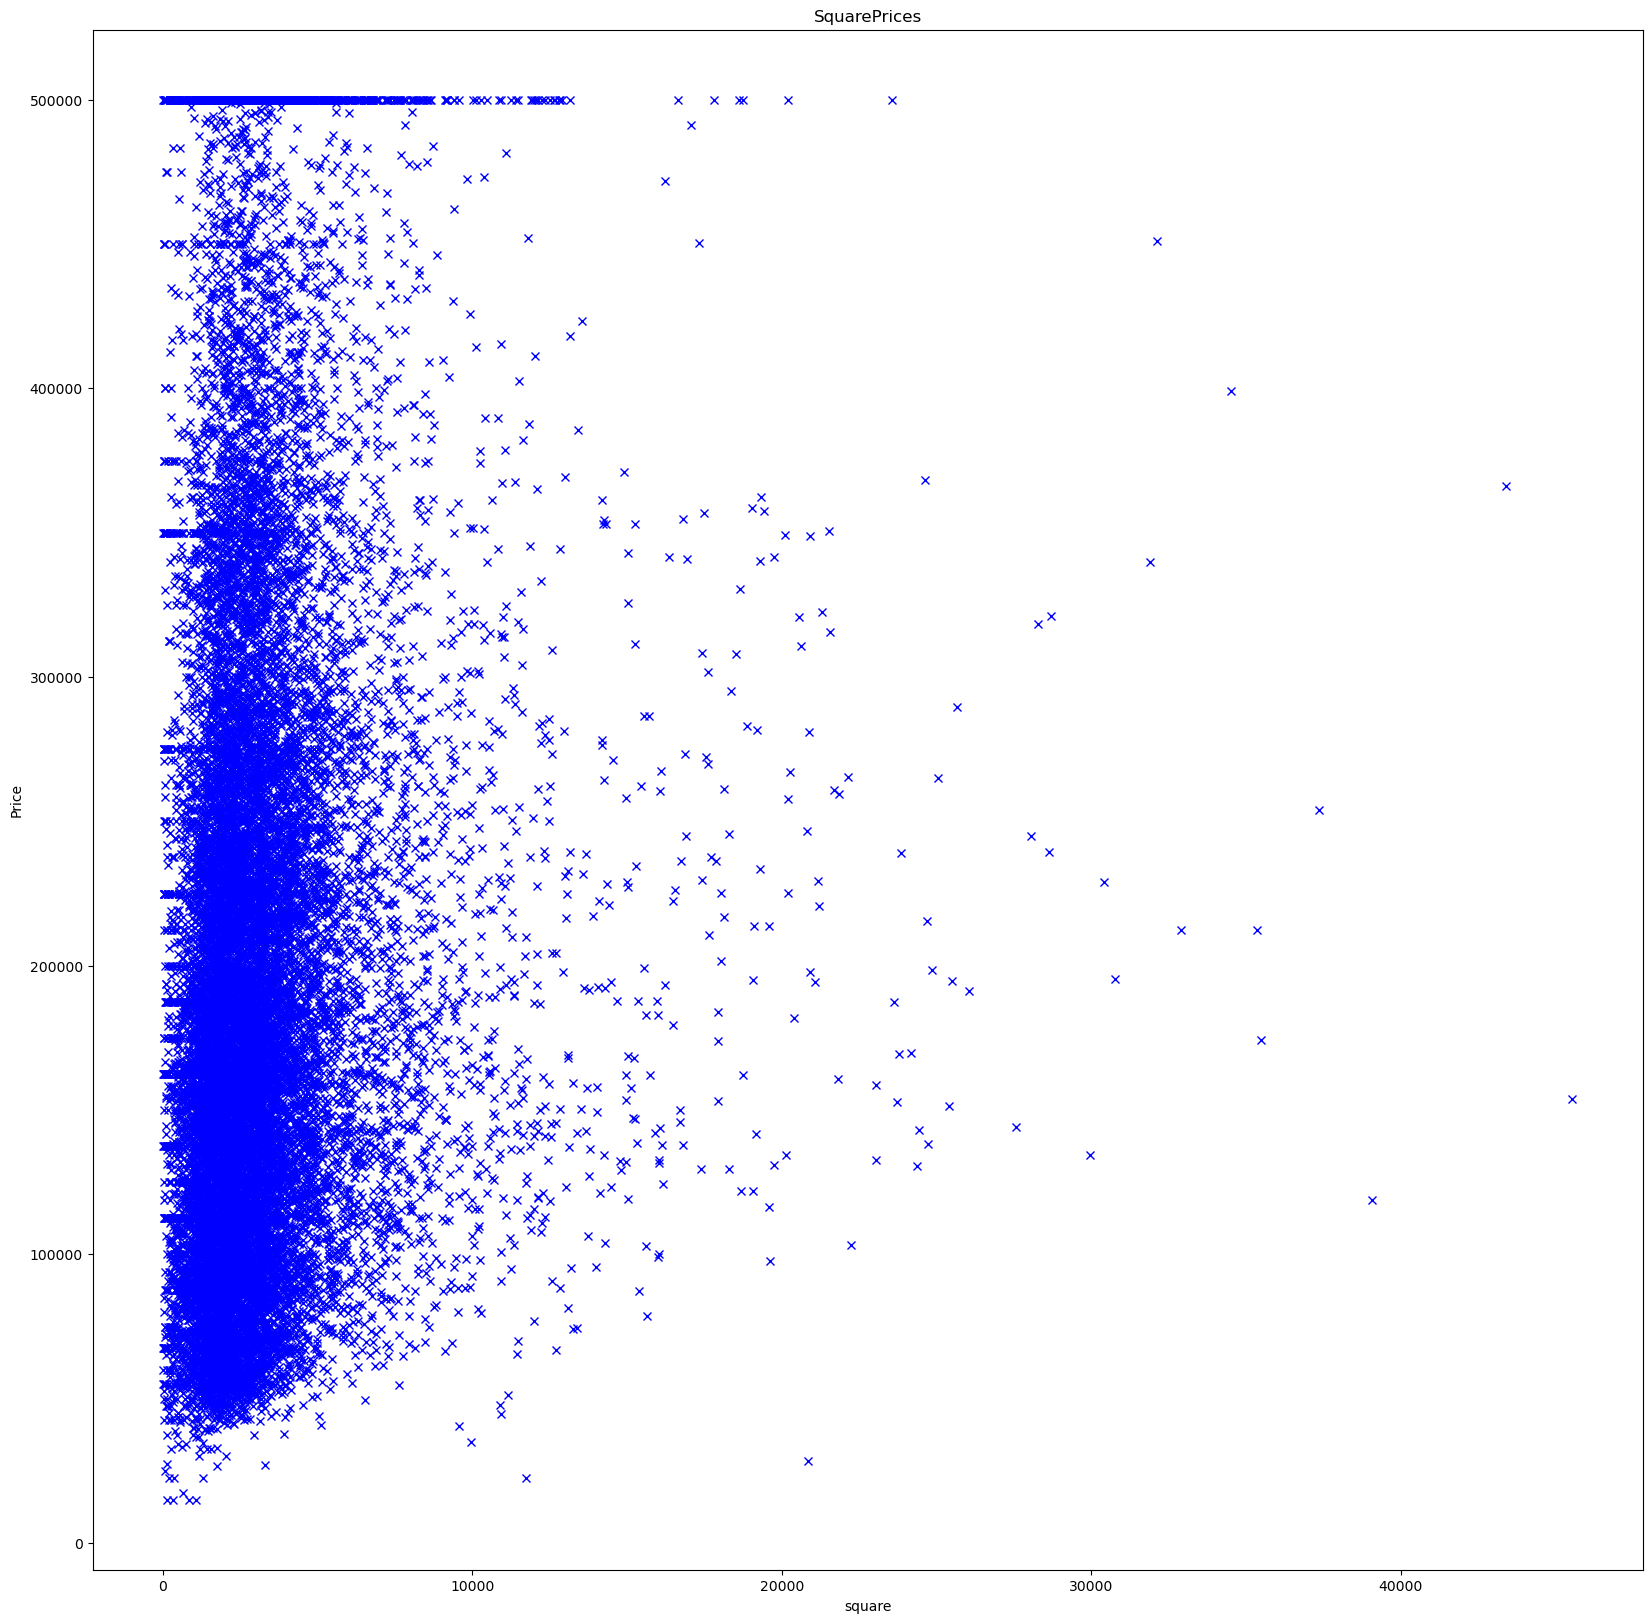

In [46]:
plt.figure(figsize = (20,20))
plt.title('HouseholdPrices')
plt.xlabel('households')
plt.ylabel('price')
plt.plot(features['households'], label, 'r^')

plt.figure(figsize = (20, 20))
plt.title('SquarePrices')
plt.xlabel('square')
plt.ylabel('Price')
plt.plot(features['square'], label, 'bx')

In [47]:
train_x, test_x, train_y, test_y = train_test_split(features, label, test_size = 0.3, random_state = 42)




In [52]:
lr = LinearRegression()
lr.fit(train_x, train_y)
score = lr.score(test_x, test_y)
score

0.015728331155819397